In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-price-prediction/Medical_insurance.csv


**Load Dataset**

In [2]:
df=pd.read_csv('/kaggle/input/medical-insurance-price-prediction/Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(2772, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.duplicated().sum()

1435

In [8]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

**Visualization Data**

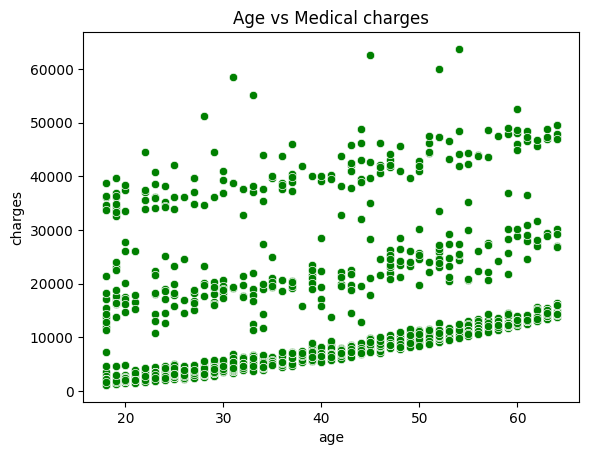

In [10]:
sns.scatterplot(data=df,x='age',y='charges',color='green')
plt.title('Age vs Medical charges')
plt.show()

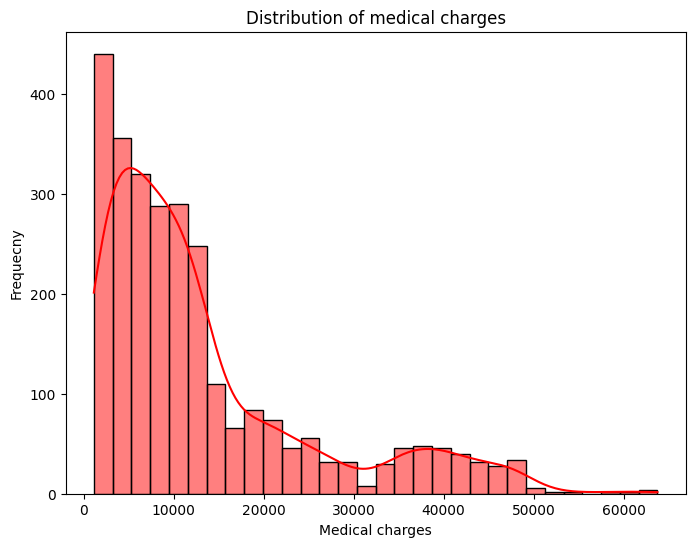

In [11]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.histplot(df['charges'],bins=30,kde='True',color='red',edgecolor='black')
plt.title('Distribution of medical charges')
plt.xlabel('Medical charges')
plt.ylabel('Frequecny')
plt.show()

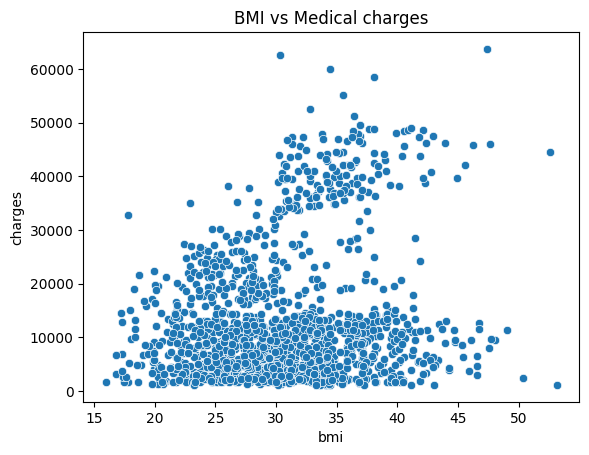

In [12]:
sns.scatterplot(data=df,x='bmi',y='charges')
plt.title('BMI vs Medical charges')
plt.show()

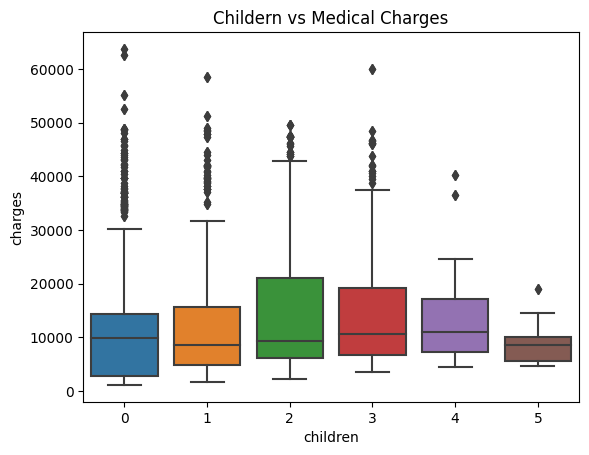

In [13]:
sns.boxplot(data=df,x='children',y='charges')
plt.title('Childern vs Medical Charges')
plt.show()

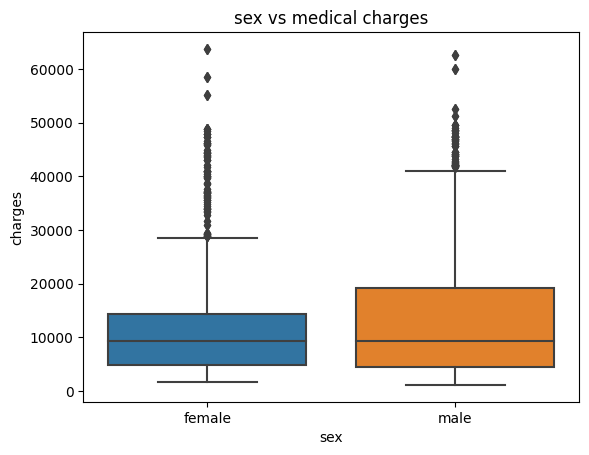

In [14]:
sns.boxplot(data=df,x='sex',y='charges')
plt.title('sex vs medical charges')
plt.show()

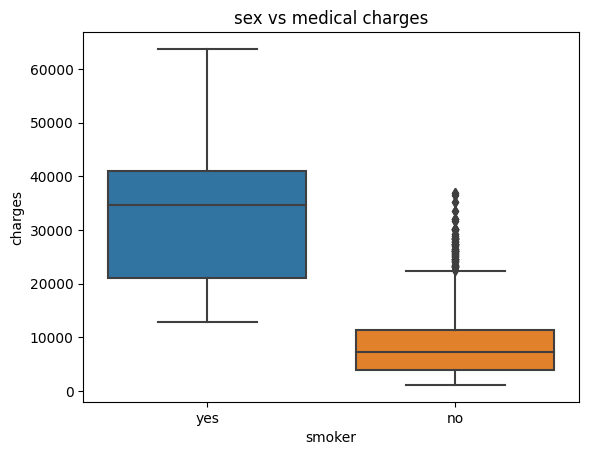

In [15]:
sns.boxplot(data=df,x='smoker',y='charges')
plt.title('sex vs medical charges')
plt.show()

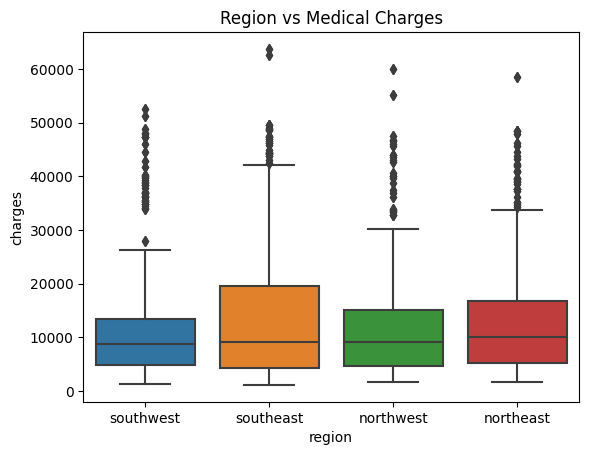

In [16]:
sns.boxplot(data=df, x='region', y='charges')
plt.title('Region vs Medical Charges')
plt.show()


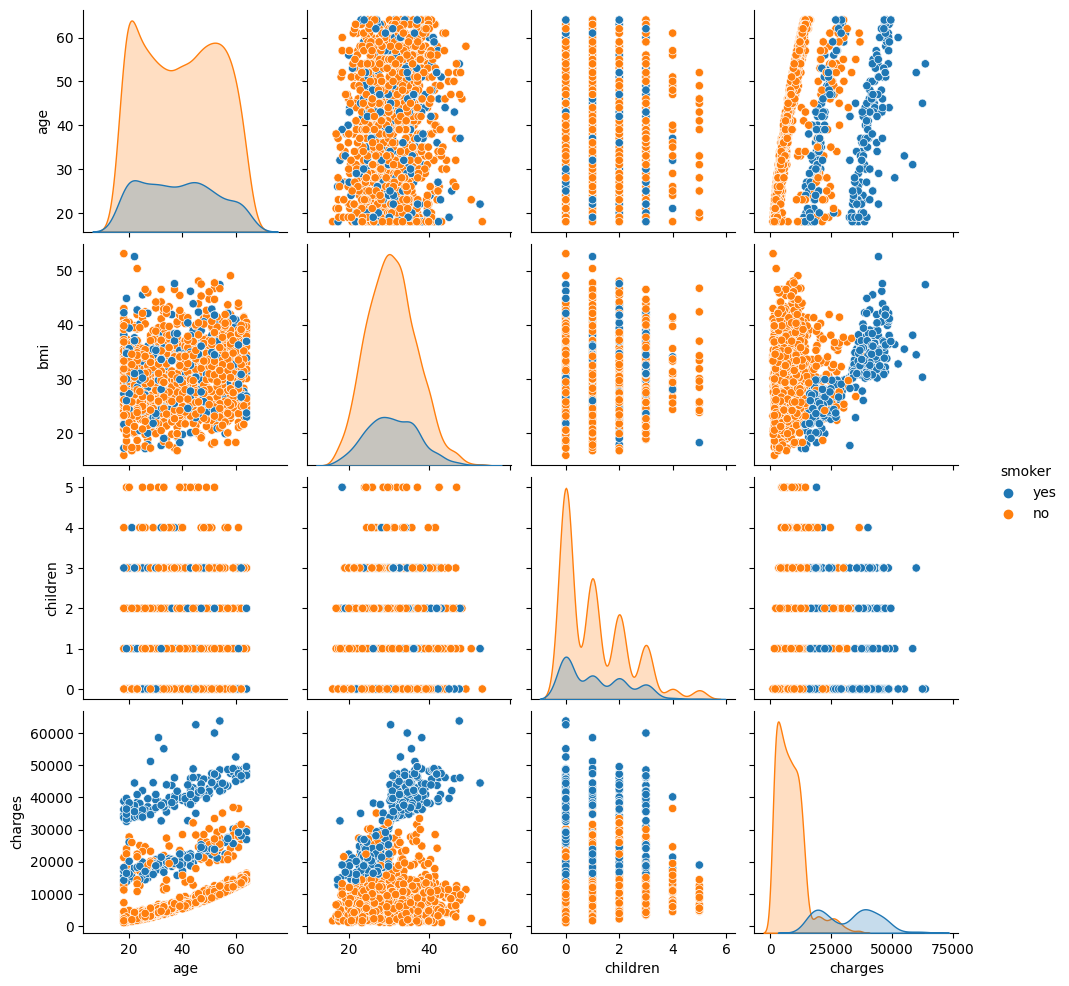

In [17]:
sns.pairplot(df,vars=['age', 'bmi', 'children', 'charges'],hue='smoker')
plt.show()

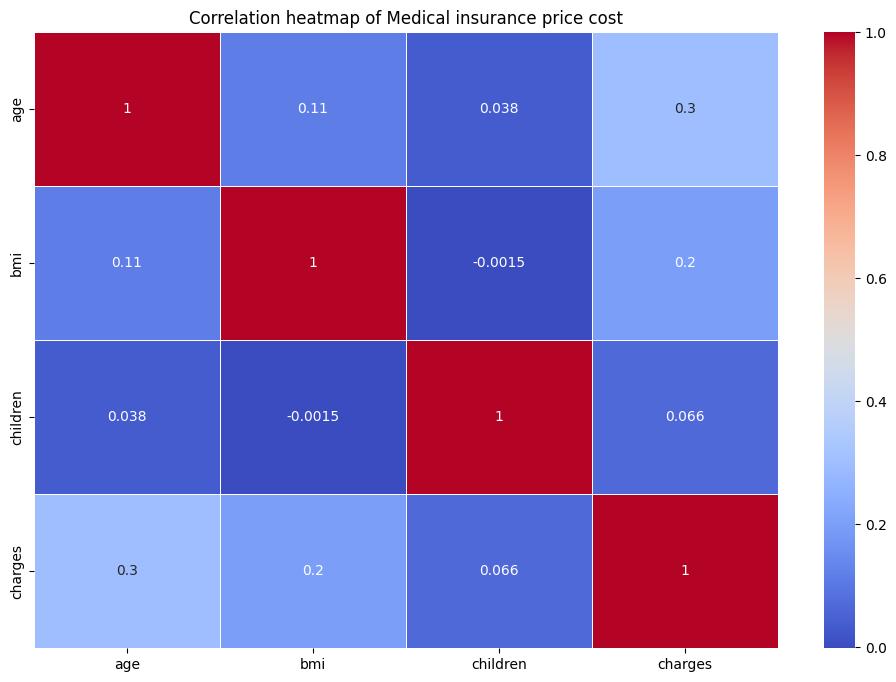

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True,linewidth=0.5)
plt.title('Correlation heatmap of Medical insurance price cost')
plt.show()


In [19]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [20]:
df=pd.get_dummies(df,columns=['region'],drop_first=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


**Split and Test Data**

In [22]:
x = df.drop(columns=['charges'])  # all columns except 'charges'
y = df['charges']                 # target column


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

**MODEL-1:Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
lr.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#predicting 
y_pred_train=lr.predict(x_train_scaled)
y_pred_test=lr.predict(x_test_scaled)


print('mean absolute error:',mean_absolute_error(y_train,y_pred_train))
print('mean squared error:',mean_squared_error(y_train,y_pred_train))
print('r2 score:',r2_score(y_train,y_pred_train))

print('mean absolute error:',mean_absolute_error(y_test,y_pred_test))
print('mean squared error:',mean_squared_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))



mean absolute error: 4133.8139962942105
mean squared error: 35992632.37756397
r2 score: 0.7536150843902418
mean absolute error: 4325.9949244550235
mean squared error: 40141698.6753488
r2 score: 0.7384581161472816


In [27]:
#use Ridge regression 
from sklearn.linear_model import Ridge

#create ridge model 
ridge=Ridge(alpha=1.0)
ridge.fit(x_train_scaled,y_train)

Ridge()

In [28]:
#predicting 
y_pred_train=ridge.predict(x_train_scaled)
y_pred_test=ridge.predict(x_test_scaled)


print('mean absolute error:',mean_absolute_error(y_train,y_pred_train))
print('mean squared error:',mean_squared_error(y_train,y_pred_train))
print('r2 score:',r2_score(y_train,y_pred_train))

print('mean absolute error:',mean_absolute_error(y_test,y_pred_test))
print('mean squared error:',mean_squared_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))

mean absolute error: 4134.3974939196405
mean squared error: 35992656.098152205
r2 score: 0.7536149220127011
mean absolute error: 4326.93115603126
mean squared error: 40140290.14415448
r2 score: 0.7384672933847725


In [29]:
#use lasso 
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=100)
lasso.fit(x_train_scaled,y_train)

Lasso(alpha=100)

In [30]:
#predicting 
y_pred_train=lasso.predict(x_train_scaled)
y_pred_test=lasso.predict(x_test_scaled)


print('mean absolute error:',mean_absolute_error(y_train,y_pred_train))
print('mean squared error:',mean_squared_error(y_train,y_pred_train))
print('r2 score:',r2_score(y_train,y_pred_train))

print('mean absolute error:',mean_absolute_error(y_test,y_pred_test))
print('mean squared error:',mean_squared_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))

mean absolute error: 4133.204195826956
mean squared error: 36093944.488900825
r2 score: 0.7529215597894255
mean absolute error: 4336.43170893953
mean squared error: 40299957.72587979
r2 score: 0.7374269846411794


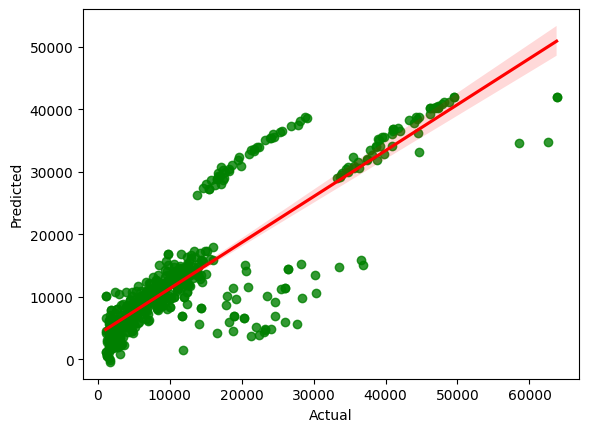

In [31]:
sns.regplot(x=y_test,y=y_pred_test,line_kws={'color':'red'},color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**MODEL-2: Support Vector Regressor**

In [32]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=100,epsilon=2,gamma='auto')
svr.fit(x_train_scaled,y_train)


SVR(C=100, epsilon=2, gamma='auto', kernel='linear')

In [33]:
#predicting 
y_pred_train=svr.predict(x_train_scaled)
y_pred_test=svr.predict(x_test_scaled)


print('mean absolute error:',mean_absolute_error(y_train,y_pred_train))
print('mean squared error:',mean_squared_error(y_train,y_pred_train))
print('r2 score:',r2_score(y_train,y_pred_train))

print('mean absolute error:',mean_absolute_error(y_test,y_pred_test))
print('mean squared error:',mean_squared_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))

mean absolute error: 3450.7105769768464
mean squared error: 40678352.39622618
r2 score: 0.7215393329070384
mean absolute error: 3631.815944118645
mean squared error: 45015704.46951637
r2 score: 0.7067016957818804


**Model-3: RandomForest**

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=2, min_samples_leaf=1,random_state=42)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [35]:
#predicting 
y_pred_train=rf.predict(x_train_scaled)
y_pred_test=rf.predict(x_test_scaled)


print('mean absolute error:',mean_absolute_error(y_train,y_pred_train))
print('mean squared error:',mean_squared_error(y_train,y_pred_train))
print('r2 score:',r2_score(y_train,y_pred_train))

print('mean absolute error:',mean_absolute_error(y_test,y_pred_test))
print('mean squared error:',mean_squared_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))

mean absolute error: 486.06278282733814
mean squared error: 1142206.7457390693
r2 score: 0.9921811077971268
mean absolute error: 1969.9320745355533
mean squared error: 15111380.548661929
r2 score: 0.9015423096995279


**Use GridSearchCV**

In [36]:
from sklearn.model_selection import GridSearchCV



    
params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}


rf=RandomForestRegressor(random_state=42)

grid= GridSearchCV(rf,param_grid=params,cv=3,scoring='r2',n_jobs=-1)
grid.fit(x_train_scaled,y_train)

print('Best parameters:',grid.best_params_)
print('Best cross validatation accuracy:',grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross validatation accuracy: 0.9160684810861547


In [37]:
best_model = grid.best_estimator_

y_train_pred = best_model.predict(x_train_scaled)
y_test_pred = best_model.predict(x_test_scaled)

from sklearn.metrics import r2_score

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train R²: 0.9921832987014388
Test R²: 0.9011717147928345


**Model-4: Xgboost**

In [38]:
from xgboost import XGBRegressor

xgb= XGBRegressor(

 n_estimators=100,     # number of trees
    learning_rate=0.1,   # step size shrinkage
    max_depth=2,          # depth of each tree
    subsample=0.8,        # % of training data for each tree
    colsample_bytree=0.8, # % of features per tree
    random_state=42,
    reg_alpha=1,        # L1 regularization (lasso-like)
    reg_lambda=1,       # L2 regularization (ridge-like))
)
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# Predictions
y_train_pred = xgb.predict(x_train_scaled)
y_test_pred = xgb.predict(x_test_scaled)

# Metrics
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train MAE: 2285.780070487071
Train MSE: 17455092.04989809
Train R2: 0.8805124521996471
Test MAE: 2823.3916002353603
Test MSE: 23385198.72661016
Test R2: 0.8476345264137064


**Model-5:Decession Tree**

In [40]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='poisson',max_depth=15,min_samples_split=8,min_samples_leaf=2,random_state=42)
model.fit(x_train_scaled,y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=15, min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [41]:
# Predictions
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Metrics
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train MAE: 836.0420859295022
Train MSE: 5010374.278289409
Train R2: 0.9657018516795356
Test MAE: 2104.709952767261
Test MSE: 22993121.075991247
Test R2: 0.8501890951226383


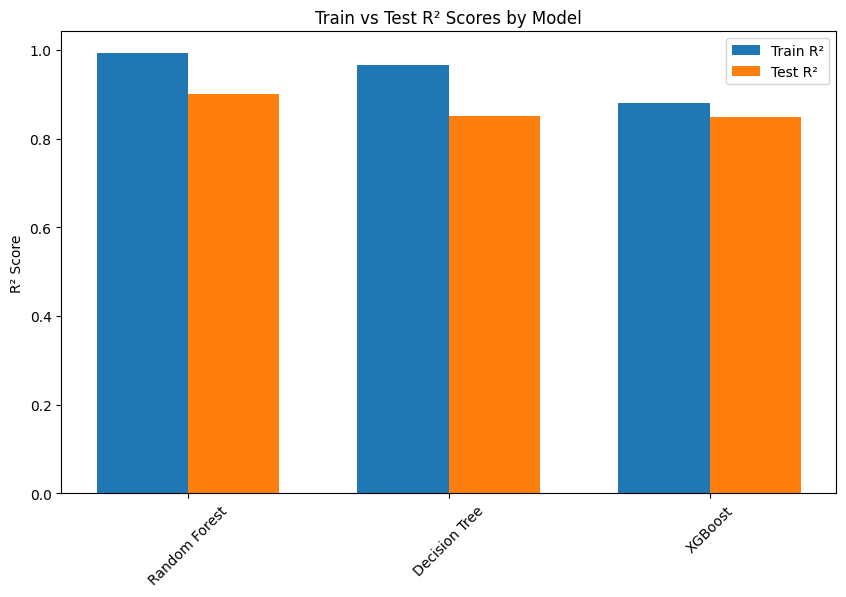

In [42]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Decision Tree', 'XGBoost']
train_r2 = [0.992, 0.966, 0.881]
test_r2 = [0.901, 0.850, 0.848]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, train_r2, width, label='Train R²')
rects2 = ax.bar(x + width/2, test_r2, width, label='Test R²')

ax.set_ylabel('R² Score')
ax.set_title('Train vs Test R² Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees
ax.legend()
plt.show()
